<a href="https://colab.research.google.com/github/Paulin178/Machine-Learning/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

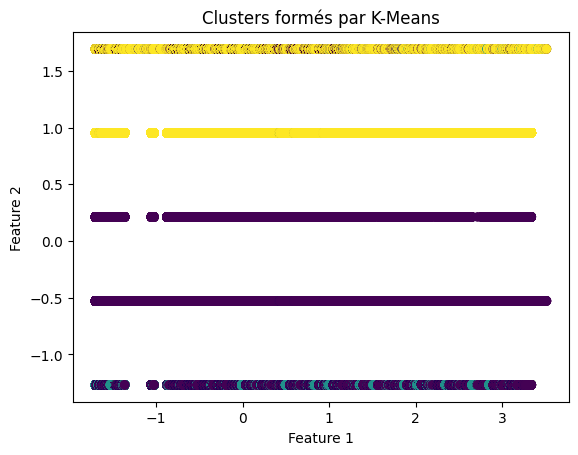

In [2]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Chargement des données à partir du fichier CSV
data = pd.read_csv('clear_data.csv')

# Sélection des colonnes pertinentes dans notre fichier CSV
selected_columns = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                    'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'isFraud']

# Cette ligne est utilisée pour sélectionner uniquement les colonnes spécifiées
# dans la liste selected_columns à partir du DataFrame data.
# Cela permet de filtrer le DataFrame initial et de conserver uniquement les colonnes
# jugées pertinentes pour l'analyse ou la modélisation.
data = data[selected_columns]

# La ligne de code data.dropna(inplace=True) est utilisée pour supprimer les lignes contenant
# des valeurs manquantes (NaN) du DataFrame data. Cette opération est réalisée de manière inplace,
# ce qui signifie que le DataFrame original est modifié directement, plutôt que de créer une copie modifiée.
data.dropna(inplace=True)

# Encodage des variables catégorielles avec LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['type', 'nameOrig', 'nameDest']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Séparation des caractéristiques (X)
# Prépare mes données pour l'entraînement d'un modèle
X = data

# Mise à l'échelle des données permet de d'assurer que chaque caractéristiques contribuent de manière équitable au modèle.
# Normaliser des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Création d'un modèle K-Means avec 3 clusters (à adapter selon le besoin)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Explicitly set n_init

# Entraînement du modèle
kmeans.fit(X_scaled)

# Prédictions des clusters sur les données
labels = kmeans.labels_

# Ajout des labels des clusters à notre DataFrame
data['cluster'] = labels

# Visualisation des clusters dans l'espace 2D (à adapter selon le besoin)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title('Clusters formés par K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
